In [2]:
# (실습 2) 이미지 검색창에 원하는 키워드 입력하기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()    
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl") 

elem = driver.find_element_by_name("q")
elem.send_keys("iu")
elem.send_keys(Keys.RETURN)

C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/4267792544.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_name("q")


In [3]:
# (실습 3) 첫 번째 작은 이미지 선택 및 클릭 기능 구현
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()    
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl") 

elem = driver.find_element_by_name("q")
elem.send_keys("iu")
elem.send_keys(Keys.RETURN)

driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()

C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/2990585379.py:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_name("q")
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/2990585379.py:12: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()


In [4]:
# (실습 4) 콘솔에 큰 이미지 주소 출력하기
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Chrome()    
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl") 

elem = driver.find_element_by_name("q")
elem.send_keys("iu")
elem.send_keys(Keys.RETURN)

driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()
time.sleep(2)
print("주소: ", driver.find_element_by_css_selector(".n3VNCb").get_attribute("src"))

driver.close()

C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/1283983252.py:9: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_name("q")
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/1283983252.py:13: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/1283983252.py:15: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  print("주소: ", driver.find_element_by_css_selector(".n3VNCb").get_attribute("src"))


주소:  https://upload.wikimedia.org/wikipedia/commons/0/0f/IU_posing_for_Marie_Claire_Korea_March_2022_issue_03.jpg


In [5]:
# (실습 5) 하나의 이미지 다운로드 코드 구현
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import requests

driver = webdriver.Chrome()    
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl") 

elem = driver.find_element_by_name("q")
elem.send_keys("iu")
elem.send_keys(Keys.RETURN)

driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()
time.sleep(2)
image_url = driver.find_element_by_css_selector(".n3VNCb").get_attribute("src")
r = requests.get(image_url)
with open('test.jpg', 'wb') as f:
    f.write(r.content)
    
driver.close()

C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/4263361547.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_name("q")
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/4263361547.py:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  driver.find_elements_by_css_selector(".rg_i.Q4LuWd")[0].click()
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/4263361547.py:16: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  image_url = driver.find_element_by_css_selector(".n3VNCb").get_attribute("src")


C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/219213000.py:10: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = driver.find_element_by_name("q")
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/219213000.py:14: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
C:\Users\ldy\AppData\Local\Temp/ipykernel_14488/219213000.py:21: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  image_url = driver.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute("src")


image_url https://upload.wikimedia.org/wikipedia/commons/0/0f/IU_posing_for_Marie_Claire_Korea_March_2022_issue_03.jpg
image_url https://pbs.twimg.com/profile_images/1374979417915547648/vKspl9Et_400x400.jpg
image_url https://image.bugsm.co.kr/artist/images/1000/800491/80049126.jpg
image_url https://6.vikiplatform.com/image/a11230e2d98d4a73825a4c10c8c6feb0.jpg?x=b&a=0x0&s=590x330&q=h&e=t&f=t&cb=1
image_url https://pbs.twimg.com/media/FYqbwnyakAAKjAo?format=jpg&name=medium
image_url https://i.ytimg.com/vi/3iM_06QeZi8/maxresdefault.jpg
image_url https://i.discogs.com/-ym0ebss-Ifz4PAZC7MGRd-bcMiCcMTMBzksSG6HrxI/rs:fit/g:sm/q:40/h:300/w:300/czM6Ly9kaXNjb2dz/LWRhdGFiYXNlLWlt/YWdlcy9BLTIyMjYz/MDYtMTU5NzMzMjM5/Mi03MzMwLmpwZWc.jpeg
image_url https://koreajoongangdaily.joins.com/data/photo/2022/06/08/ea56ba59-5701-4194-bbe9-2a4b5010c67a.jpg
image_url https://kpophighindia.com/wp-content/uploads/2021/04/PhotoCollage_20210419_143810927-1.jpg
image_url https://i.ytimg.com/vi/d9IxdwEFk1c/maxresdefau
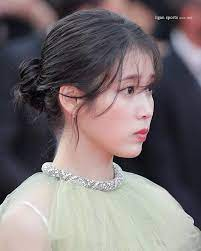
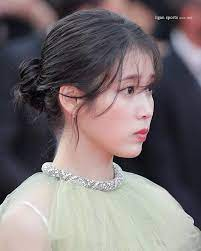
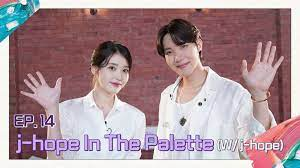
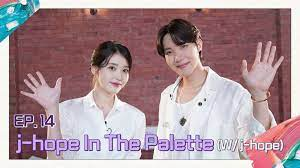

KeyboardInterrupt: 

In [10]:
# (실습 6) 현재 페이지의 모든 이미지 다운로드 코드 구현
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import requests

driver = webdriver.Chrome()    
driver.get("https://www.google.co.kr/imghp?hl=ko&ogbl") 

elem = driver.find_element_by_name("q")
elem.send_keys("iu")
elem.send_keys(Keys.RETURN)

images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
img_number = 1
    
for image in images:
    try:
        image.click()
        time.sleep(2)
        image_url = driver.find_element_by_xpath('//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute("src")
        print('image_url', image_url)
        r = requests.get(image_url)
        image_name = f'./download_images/img{img_number}.jpg'
        with open(image_name, 'wb') as f:
            f.write(r.content)
        img_number += 1
    except Exception as e:
        print('에러 발생', e)
        
driver.close()